In [1]:
#import potrzebnych bibliotek
using LinearAlgebra
using IterativeSolvers
using BenchmarkTools
include("matrix-generator.jl")

femproblem (generic function with 1 method)

In [2]:
#Implementacja nieoptymalnej wersjii Gaussa Seidla
function gauss_seidel_nonoptimal!(x::Vector{Float64}, A::Matrix{Float64}, b::Vector{Float64}; eps::Float64=10^(-3))
    """
    Input:
    A (matrix): Co-efficient Matrix
    b (matrix): Matrix of real number
    eps (numeric): value of tolerance error

    Output:
    x (matrix): Matrix of counted results
    """
    # inital vector of results

    # initial auxiliary variables
    error = Inf
    k = 0
    error_list = []

    # main loop of algorithm
    while error > eps
        # guess value vecotr
        p = copy(x)
        # loop after the unknowns
        for i = 1:size(b)[1]
            
            # Gauss_seidel formula 
            # case when i = 1
            if isempty(A[i,1:end.<i])
                x[i] = (b[i] - sum((A[i,1:end.>i] .* p[1:end.>i]))) / A[i, i]
            # case when i = last
            elseif isempty(A[i,1:end.>i])
                x[i] = (b[i] - sum((A[i,1:end.<i] .* x[1:end.<i]))) / A[i, i]
            # other cases
            else
                x[i] = (b[i] - sum((A[i,1:end.<i] .* x[1:end.<i])) - sum((A[i,1:end.>i] .* p[1:end.>i]))) / A[i, i]
            end
        end
        # count error
        error = maximum(abs.(x - p))
        append!(error_list, error)
        # increase iterator
        k += 1
    end
    return k
end

function gauss_seidel_nonoptimal(A::Matrix{Float64}, b::Vector{Float64}; eps::Float64=10^(-3))
    """
    Input:
    A (matrix): Co-efficient Matrix
    b (matrix): Matrix of real number
    eps (numeric): value of tolerance error

    Output:
    x (matrix): Matrix of counted results
    """
    # inital vector of results

    # initial auxiliary variables
    error = Inf
    k = 0
    error_list = []
    x = zeros(size(b))
    # main loop of algorithm
    while error > eps
        # guess value vecotr
        p = copy(x)
        # loop after the unknowns
        for i = 1:size(b)[1]
            
            # Gauss_seidel formula 
            # case when i = 1
            if isempty(A[i,1:end.<i])
                x[i] = (b[i] - sum((A[i,1:end.>i] .* p[1:end.>i]))) / A[i, i]
            # case when i = last
            elseif isempty(A[i,1:end.>i])
                x[i] = (b[i] - sum((A[i,1:end.<i] .* x[1:end.<i]))) / A[i, i]
            # other cases
            else
                x[i] = (b[i] - sum((A[i,1:end.<i] .* x[1:end.<i])) - sum((A[i,1:end.>i] .* p[1:end.>i]))) / A[i, i]
            end
        end
        # count error
        error = maximum(abs.(x - p))
        append!(error_list, error)
        # increase iterator
        k += 1
    end
    return x, k
end

#Implementacja nieoptymalnej wersjii Gaussa Seidla
function gauss_seidel_nonoptimal_iter!(x::Vector{Float64}, A::Matrix{Float64}, b::Vector{Float64}; iters::Int64=10)
    """
    Input:
    A (matrix): Co-efficient Matrix
    b (matrix): Matrix of real number
    eps (numeric): value of tolerance error

    Output:
    x (matrix): Matrix of counted results
    """
    # inital vector of results

    # initial auxiliary variables
    error = Inf
    k = 0
    error_list = []

    # main loop of algorithm
    for j = 1 : iters
        # guess value vecotr
        p = copy(x)
        # loop after the unknowns
        for i = 1:size(b)[1]
            
            # Gauss_seidel formula 
            # case when i = 1
            if isempty(A[i,1:end.<i])
                x[i] = (b[i] - sum((A[i,1:end.>i] .* p[1:end.>i]))) / A[i, i]
            # case when i = last
            elseif isempty(A[i,1:end.>i])
                x[i] = (b[i] - sum((A[i,1:end.<i] .* x[1:end.<i]))) / A[i, i]
            # other cases
            else
                x[i] = (b[i] - sum((A[i,1:end.<i] .* x[1:end.<i])) - sum((A[i,1:end.>i] .* p[1:end.>i]))) / A[i, i]
            end
        end
        k += 1
    end
    return k
end

function gauss_seidel_nonoptimal_iter(A::Matrix{Float64}, b::Vector{Float64}; iters::Int64 = 10)
    """
    Input:
    A (matrix): Co-efficient Matrix
    b (matrix): Matrix of real number
    eps (numeric): value of tolerance error

    Output:
    x (matrix): Matrix of counted results
    """
    # inital vector of results

    # initial auxiliary variables
    error = Inf
    k = 0
    error_list = []
    x = zeros(size(b))
    # main loop of algorithm
    for j = 1 : iters
        # guess value vecotr
        p = copy(x)
        # loop after the unknowns
        for i = 1:size(b)[1]
            
            # Gauss_seidel formula 
            # case when i = 1
            if isempty(A[i,1:end.<i])
                x[i] = (b[i] - sum((A[i,1:end.>i] .* p[1:end.>i]))) / A[i, i]
            # case when i = last
            elseif isempty(A[i,1:end.>i])
                x[i] = (b[i] - sum((A[i,1:end.<i] .* x[1:end.<i]))) / A[i, i]
            # other cases
            else
                x[i] = (b[i] - sum((A[i,1:end.<i] .* x[1:end.<i])) - sum((A[i,1:end.>i] .* p[1:end.>i]))) / A[i, i]
            end
        end
        k += 1
    end
    return x, k
end

gauss_seidel_nonoptimal_iter (generic function with 1 method)

In [3]:
#optymalna implementacja algorytmu Gaussa-Seidla
function my_abs!(val::Float64) :: Float64
    return val >= 0 ? val : -val
end

function gauss_seidel_optimal!(x::Vector{Float64}, A::Matrix{Float64}, b::Vector{Float64}; eps::Float64 = 10^(-3))
    """
    Input:
    A (matrix): Co-efficient Matrix
    b (matrix): Matrix of real number
    eps (numeric): value of tolerance error

    Output:
    x (matrix): Matrix of counted results
    """
    # inital vector of results
    p = similar(x)
    # initial auxiliary variables
    error = [Inf]
    k = 0
    b_size = size(b)[1]
    summ = [0.0 0.0]
    mull = zeros(b_size)
    temp = zeros(b_size)
    
    # main loop of algorithm
    while error[1] > eps
        p[:] = x
        # loop after the unknowns
        for i = 1:b_size # b_size[1]
            @views mull[i+1 : end] .= A[i,(i+1):end] .* p[(i+1):end]
            @views mull[1: i-1] .= A[i,1:(i-1)] .* x[1:(i-1)]
            @views summ[2] = sum(mull[i+1:end])
            @views summ[1] = sum(mull[1:i-1])
            @views x[i] = (b[i] .- summ[1] .- summ[2])./ A[i, i] # @views
        end
        # count error
        temp[:] .= x .- p
        temp .= my_abs!.(temp)
        maximum!(error, temp)
        # increase iterator
        k += 1
    end
    
    return k
end

function gauss_seidel_optimal(A::Matrix{Float64}, b::Vector{Float64}; eps::Float64 = 10^(-3))
    """
    Input:
    A (matrix): Co-efficient Matrix
    b (matrix): Matrix of real number
    eps (numeric): value of tolerance error

    Output:
    x (matrix): Matrix of counted results
    """
    # inital vector of results
    # initial auxiliary variables
    error = [Inf]
    k = 0
    b_size = size(b)[1]
    x = zeros(b_size)
    p = similar(x)
    summ = [0.0 0.0]
    mull = zeros(b_size)
    temp = zeros(b_size)
    
    # main loop of algorithm
    while error[1] > eps
        p[:] = x
        # loop after the unknowns
        for i = 1:b_size # b_size[1]
            @views mull[i+1 : end] .= A[i,(i+1):end] .* p[(i+1):end]
            @views mull[1: i-1] .= A[i,1:(i-1)] .* x[1:(i-1)]
            @views summ[2] = sum(mull[i+1:end])
            @views summ[1] = sum(mull[1:i-1])
            @views x[i] = (b[i] .- summ[1] .- summ[2])./ A[i, i] # @views
        end
        # count error
        temp[:] .= x .- p
        temp .= my_abs!.(temp)
        maximum!(error, temp)
        # increase iterator
        k += 1
    end
    
    return x, k
end

function gauss_seidel_optimal_iter!(x::Vector{Float64}, A::Matrix{Float64}, b::Vector{Float64}; iters::Int64 = 10)
    """
    Input:
    A (matrix): Co-efficient Matrix
    b (matrix): Matrix of real number
    eps (numeric): value of tolerance error

    Output:
    x (matrix): Matrix of counted results
    """
    # inital vector of results
    p = similar(x)
    # initial auxiliary variables
    error = [Inf]
    k = 0
    b_size = size(b)[1]
    summ = [0.0 0.0]
    mull = zeros(b_size)
    temp = zeros(b_size)
    
    # main loop of algorithm
    for j = 1:iters
        p[:] = x
        # loop after the unknowns
        for i = 1:b_size # b_size[1]
            @views mull[i+1 : end] .= A[i,(i+1):end] .* p[(i+1):end]
            @views mull[1: i-1] .= A[i,1:(i-1)] .* x[1:(i-1)]
            @views summ[2] = sum(mull[i+1:end])
            @views summ[1] = sum(mull[1:i-1])
            @views x[i] = (b[i] .- summ[1] .- summ[2])./ A[i, i] # @views
        end
        k += 1
    end
    
    return k
end

function gauss_seidel_optimal_iter(A::Matrix{Float64}, b::Vector{Float64}; iters::Int64 = 10)
    """
    Input:
    A (matrix): Co-efficient Matrix
    b (matrix): Matrix of real number
    eps (numeric): value of tolerance error

    Output:
    x (matrix): Matrix of counted results
    """
    # inital vector of results
    # initial auxiliary variables
    error = [Inf]
    k = 0
    b_size = size(b)[1]
    x = zeros(b_size)
    p = similar(x)
    summ = [0.0 0.0]
    mull = zeros(b_size)
    temp = zeros(b_size)
    
    # main loop of algorithm
    for j = 1:iters
        p[:] = x
        # loop after the unknowns
        for i = 1:b_size # b_size[1]
            @views mull[i+1 : end] .= A[i,(i+1):end] .* p[(i+1):end]
            @views mull[1: i-1] .= A[i,1:(i-1)] .* x[1:(i-1)]
            @views summ[2] = sum(mull[i+1:end])
            @views summ[1] = sum(mull[1:i-1])
            @views x[i] = (b[i] .- summ[1] .- summ[2])./ A[i, i] # @views
        end
        # increase iterator
        k += 1
    end
    
    return x, k
end

gauss_seidel_optimal_iter (generic function with 1 method)

In [43]:
# Comparing different FEM sizes 
using LinearAlgebra
struct BenchmarkRes
    time_mean::Float64
    time_median::Float64
    gc_time_mean::Float64
    allocations_mean::Float64
    memory_mean::Float64
    
    function BenchmarkRes(perf::Vector{BenchmarkTools.Trial})
        time_median = mean(map(x->median(x).time, perf))
        time_mean = mean(map(x->mean(x).time, perf))
        gc_time_mean = mean(map(x->mean(x).gctime, perf))
        allocations_mean =  mean(map(x->mean(x).allocs, perf))
        memory_mean =  mean(map(x->mean(x).memory, perf))
        new(time_mean, time_median, gc_time_mean, allocations_mean, memory_mean)
    end
end

function convert_to_scaled_time(tm::Float64)
    ret = 0.0
    if tm >= 10^9
        return "$(round.(tm*10^-9; sigdigits=3))s"
    elseif tm >= 10^6
        return "$(round.(tm*10^-6; sigdigits=3))ms"
    elseif tm >= 10^3
        return "$(round.(tm*10^-3; sigdigits=3))μs"
    else 
        return "$(round.(tm; sigdigits=3))ns"
    end
end

function Base.show(io::IO, br::BenchmarkRes)
    println("BenchmarkResults")
    println("\ttime_mean: $(convert_to_scaled_time(br.time_mean))")
    println("\ttime_median: $(convert_to_scaled_time(br.time_median))")
    println("\tgc_time_mean: $(convert_to_scaled_time(br.gc_time_mean))")
    println("\tallocations_mean: $(br.allocations_mean)")
    println("\tmemory_mean: $(br.memory_mean)")
end

# function format_results(res::Vector{Vector{Float64}}, perf::Vector{Trial})
    
# end
# testy dla funkcji optymalnej i nieoptymalnej w zależności od wielkości femproblemu
function execute_benchmarks_opt_non_opt()
    fem = [10,15,20,25,30]
    retry_count = 1:3
    perf_non_opt::Vector{BenchmarkTools.Trial} = []
    perf_opt::Vector{BenchmarkTools.Trial} = []
    perf_lib::Vector{BenchmarkTools.Trial} = []
    for i = 1:size(fem)[1]
        A, b = femproblem(fem[i], fem[i])
        for j = retry_count
            non_opt = @benchmarkable gauss_seidel_nonoptimal_iter($A, $b) evals=1
            push!(perf_non_opt, run(non_opt)) 
            opt = @benchmarkable gauss_seidel_optimal_iter($A, $b) evals=1
            push!(perf_opt, run(opt))
            gslib = @benchmarkable gauss_seidel($A, $b) evals=1
            push!(perf_lib, run(gslib))
        end
        println("******************\n")
        println("Fem size: ", fem[i], " results:")
        println()
        println("Non optimal GS: ")
        println(BenchmarkRes(perf_non_opt))
        println("Optimal GS: ")
        println(BenchmarkRes(perf_opt))
        println("Library GS: ")
        println(BenchmarkRes(perf_lib))
        perf_non_opt = []
        perf_opt = []
        perf_lib = []
    end
end

execute_benchmarks_opt_non_opt()

******************

Fem size: 10 results:

Non optimal GS: 
BenchmarkResults
	time_mean: 8.91ms
	time_median: 8.56ms
	gc_time_mean: 608.0μs
	allocations_mean: 35842.0
	memory_mean: 1.274888e7

Optimal GS: 
BenchmarkResults
	time_mean: 292.0μs
	time_median: 258.0μs
	gc_time_mean: 283.0ns
	allocations_mean: 6.0
	memory_mean: 6672.0

Library GS: 
BenchmarkResults
	time_mean: 206.0μs
	time_median: 188.0μs
	gc_time_mean: 0.0ns
	allocations_mean: 2.0
	memory_mean: 1680.0

******************

Fem size: 15 results:

Non optimal GS: 
BenchmarkResults
	time_mean: 49.0ms
	time_median: 46.2ms
	gc_time_mean: 9.07ms
	allocations_mean: 108992.0
	memory_mean: 1.71944528e8

Optimal GS: 
BenchmarkResults
	time_mean: 1.5ms
	time_median: 1.34ms
	gc_time_mean: 0.0ns
	allocations_mean: 6.0
	memory_mean: 14224.0

Library GS: 
BenchmarkResults
	time_mean: 1.09ms
	time_median: 945.0μs
	gc_time_mean: 0.0ns
	allocations_mean: 2.0
	memory_mean: 3568.0

******************

Fem size: 20 results:

Non optimal GS: 
B

In [35]:
import Pkg
Pkg.add("PyPlot")

    Updating registry at `C:\Users\mikol\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\mikol\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\mikol\.julia\environments\v1.7\Manifest.toml`


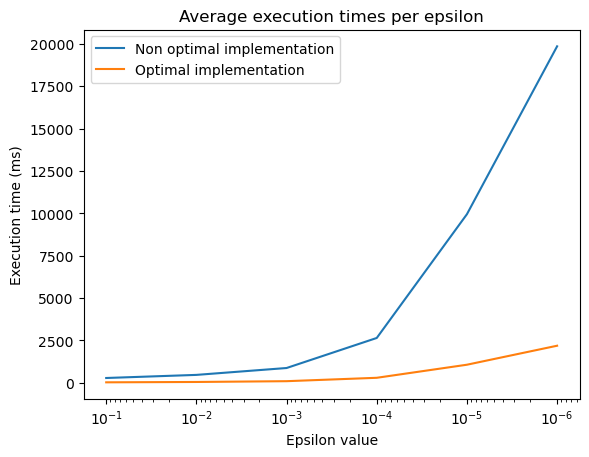

In [36]:

using PyPlot
# Time over epsilon values = (10^-1, 10^-2, ... 10^-6) for FEM (30,30)
function plot_results(exec_times_opt, exec_times_non_opt, epsilons)
    fig, sp = subplots()
    sp.set_xscale("log")
    sp.invert_xaxis()
    sp.plot(epsilons, exec_times_non_opt)
    sp.plot(epsilons, exec_times_opt)
    sp.legend(["Non optimal implementation", "Optimal implementation"])
    sp.set_title("Average execution times per epsilon")
    sp.set_xlabel("Epsilon value")
    sp.set_ylabel("Execution time (ms)")
    fig.show()
end

function execute_benchmarks_opt_non_opt_eps()
    epsilons = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]
    retry_count = 1:3
    exec_times_non_opt = [] 
    exec_times_opt = []
    fem_size = 30
    curr_exec_times_non_opt = []
    curr_exec_times_opt = []
    A, b = femproblem(fem_size, fem_size)
    for i = 1:size(epsilons)[1]
    
        non_opt = @benchmarkable gauss_seidel_nonoptimal($A, $b; eps = $epsilons[$i]) evals=3
        push!(curr_exec_times_non_opt, mean(run(non_opt)).time/1000000)
        opt = @benchmarkable gauss_seidel_optimal($A, $b; eps = $epsilons[$i]) evals=3
        push!(curr_exec_times_opt, mean(run(opt)).time/1000000)
        push!(exec_times_non_opt, mean(curr_exec_times_non_opt))
        push!(exec_times_opt, mean(curr_exec_times_opt))
        curr_exec_times_non_opt = []
        curr_exec_times_opt = []
    end
    plot_results(exec_times_opt, exec_times_non_opt, epsilons)
end

execute_benchmarks_opt_non_opt_eps()

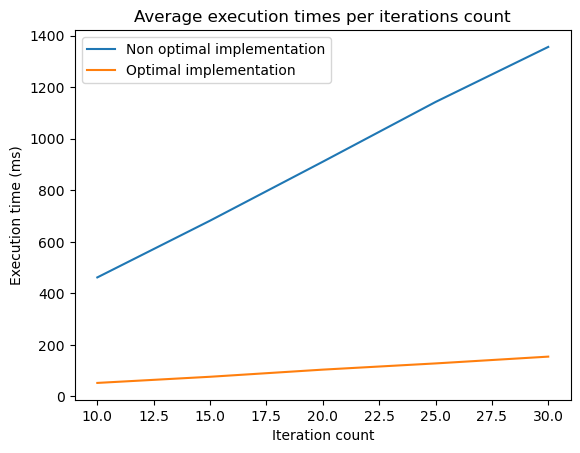

In [37]:
using PyPlot
# Time over iterations count (10^-1, 10^-2, ... 10^-6) for FEM (30,30)
function plot_results_opt_iters(exec_times_non_opt, exec_times_opt, iters)
    fig, sp = subplots()
    sp.plot(iters, exec_times_non_opt)
    sp.plot(iters, exec_times_opt)
    sp.legend(["Non optimal implementation", "Optimal implementation"])
    sp.set_title("Average execution times per iterations count")
    sp.set_xlabel("Iteration count")
    sp.set_ylabel("Execution time (ms)")
    fig.show()
end

function execute_benchmarks_opt_iters()
    iters = [10, 15, 20, 25, 30]
    retry_count = 1:3
    exec_times_opt = []
    exec_times_non_opt = []
    fem_size = 30
    curr_exec_times_non_opt = []
    curr_exec_times_opt = []
    A, b = femproblem(fem_size, fem_size)
    for i = 1:size(iters)[1]
        non_opt = @benchmarkable gauss_seidel_nonoptimal_iter($A, $b; iters = $iters[$i]) evals=3
        push!(exec_times_non_opt, mean(run(non_opt)).time/1000000)
        opt = @benchmarkable gauss_seidel_optimal_iter($A, $b; iters=$iters[$i]) evals=3
        push!(exec_times_opt, mean(run(opt)).time/1000000)
    end
    plot_results_opt_iters(exec_times_non_opt, exec_times_opt, iters)
end

execute_benchmarks_opt_iters()

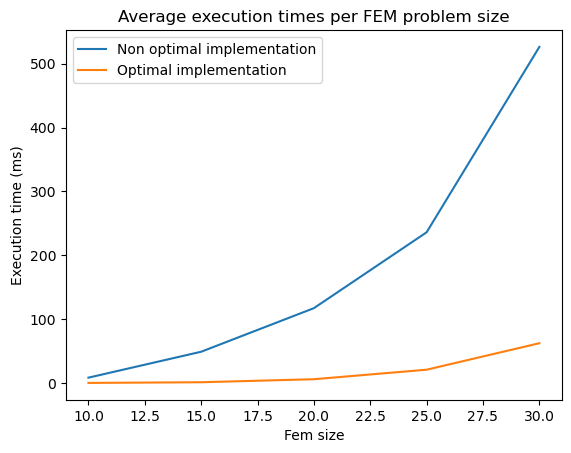

In [47]:
using PyPlot
using LinearAlgebra
# Time over fem size = (10,15,20,25,30) 
function plot_results_fems_opt(exec_times_non_opt,  exec_times_opt, fems)
    fig, sp = subplots()
    sp.plot(fems, exec_times_non_opt)
    sp.plot(fems, exec_times_opt)
    sp.legend(["Non optimal implementation", "Optimal implementation"])
    sp.set_title("Average execution times per FEM problem size")
    sp.set_xlabel("Fem size")
    sp.set_ylabel("Execution time (ms)")
    fig.show()
end

function execute_benchmarks_opt_fem()
    fem_sizes = [10, 15, 20, 25, 30]
    retry_count = 1:3
    exec_times_nonopt = []
    exec_times_opt = []
    fem_size = 30
    for i = 1:size(fem_sizes)[1]
        A, b = femproblem(fem_sizes[i], fem_sizes[i])
        non_opt = @benchmarkable gauss_seidel_nonoptimal_iter($A, $b) evals=3
        push!(exec_times_nonopt, mean(run(non_opt)).time/1000000)
        opt = @benchmarkable gauss_seidel_optimal_iter($A, $b) evals=3
        push!(exec_times_opt, mean(run(opt)).time/1000000)
    end
      
    plot_results_fems_opt(exec_times_nonopt, exec_times_opt, fem_sizes)
end

execute_benchmarks_opt_fem()

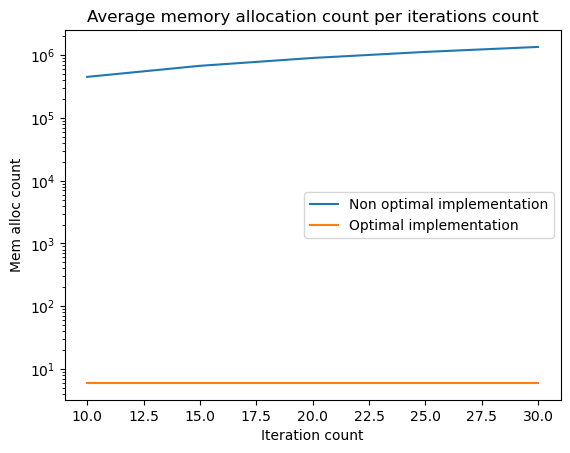

In [39]:
using PyPlot
# Memory over iterations count
function plot_results_mem(exec_times_non_opt, exec_times_opt, iters)
    fig, sp = subplots()
    sp.set_yscale("log")
    sp.plot(iters, exec_times_non_opt)
    sp.plot(iters, exec_times_opt)
    sp.legend(["Non optimal implementation", "Optimal implementation"])
    sp.set_title("Average memory allocation count per iterations count")
    sp.set_xlabel("Iteration count")
    sp.set_ylabel("Mem alloc count")
    fig.show()
end

function execute_benchmarks_opt_non_opt_mem()
    iters = [10, 15, 20, 25, 30]
    retry_count = 1:3
    exec_mem_opt = []
    exec_mem_non_opt = []
    fem_size = 30
    A, b = femproblem(fem_size, fem_size)
    for i = 1:size(iters)[1]
        non_opt = @benchmarkable gauss_seidel_nonoptimal_iter($A, $b; iters = $iters[$i]) evals=3
        push!(exec_mem_non_opt, mean(run(non_opt)).allocs)
        opt = @benchmarkable gauss_seidel_optimal_iter($A, $b; iters=$iters[$i]) evals=3
        push!(exec_mem_opt, mean(run(opt)).allocs)
    end
    plot_results_mem(exec_mem_non_opt, exec_mem_opt, iters)
end

execute_benchmarks_opt_non_opt_mem()

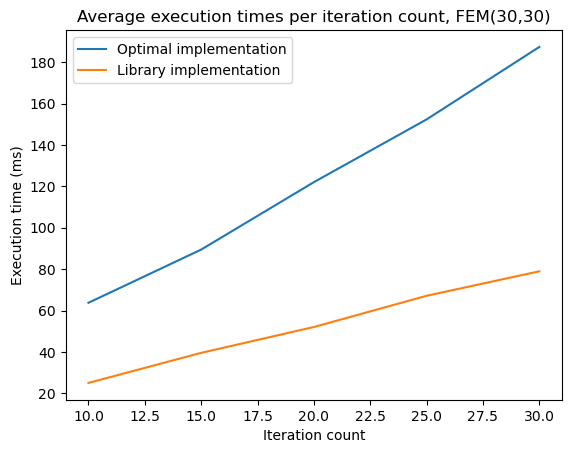

In [50]:
using PyPlot
using LinearAlgebra
# Time over iteration count = (10,15,20,25,30) for FEM (30,30)
function plot_results_iters(exec_times_opt,  exec_times_lib, iters)
    fig, sp = subplots()
    sp.plot(iters, exec_times_opt)
    sp.plot(iters, exec_times_lib)
    sp.legend(["Optimal implementation", "Library implementation"])
    sp.set_title("Average execution times per iteration count, FEM(30,30)")
    sp.set_xlabel("Iteration count")
    sp.set_ylabel("Execution time (ms)")
    fig.show()
end

function execute_benchmarks_lib_opt_iters()
    iters = [10, 15, 20, 25, 30]
    retry_count = 1:3
    exec_times_opt = []
    exec_times_lib = []
    fem_size = 30
    curr_exec_times_non_opt = []
    curr_exec_times_opt = []
    A, b = femproblem(fem_size, fem_size)
    for i = 1:size(iters)[1]
        opt = @benchmarkable gauss_seidel_optimal_iter($A, $b; iters = $iters[$i]) evals=3
        push!(exec_times_opt, mean(run(opt)).time/1000000)
        gslib = @benchmarkable gauss_seidel($A, $b; maxiter=$iters[$i]) evals=3
        push!(exec_times_lib, mean(run(gslib)).time/1000000)
    end
      
    plot_results_iters(exec_times_opt, exec_times_lib, iters)
end

execute_benchmarks_lib_opt_iters()

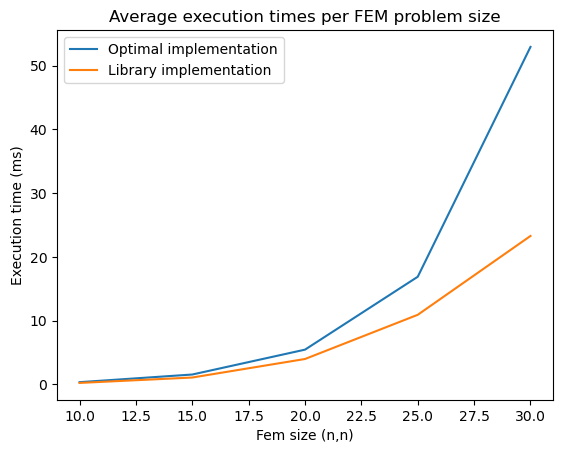

In [41]:
using PyPlot
using LinearAlgebra
# Time over fem size = (10,15,20,25,30) 
function plot_results_fems(exec_times_opt,  exec_times_lib, fems)
    fig, sp = subplots()
    sp.plot(fems, exec_times_opt)
    sp.plot(fems, exec_times_lib)
    sp.legend(["Optimal implementation", "Library implementation"])
    sp.set_title("Average execution times per FEM problem size")
    sp.set_xlabel("Fem size (n,n)")
    sp.set_ylabel("Execution time (ms)")
    fig.show()
end

function execute_benchmarks_opt_lib_fems()
    fem_sizes = [10, 15, 20, 25, 30]
    retry_count = 1:3
    exec_times_opt = []
    exec_times_lib = []
    fem_size = 30
    curr_exec_times_non_opt = []
    curr_exec_times_opt = []
    for i = 1:size(fem_sizes)[1]
        A, b = femproblem(fem_sizes[i], fem_sizes[i])
        opt = @benchmarkable gauss_seidel_optimal_iter($A, $b) evals=3
        push!(exec_times_opt, mean(run(opt)).time/1000000)
        gslib = @benchmarkable gauss_seidel($A, $b) evals=3
        push!(exec_times_lib, mean(run(gslib)).time/1000000)
    end
      
    plot_results_fems(exec_times_opt, exec_times_lib, fem_sizes)
end

execute_benchmarks_opt_lib_fems()

In [46]:
A, b = femproblem(10, 10)
x = @benchmark gauss_seidel_nonoptimal_iter(A, b)
xm = mean(x)
xm

BenchmarkTools.TrialEstimate: 
  time:             7.674 ms
  gctime:           559.840 μs (7.29%)
  memory:           12.16 MiB
  allocs:           35842